<a href="https://colab.research.google.com/github/aprasad6369-stack/Spark4Change/blob/main/Spark4Change_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
# Check current working directory
os.getcwd()
# Change working directory
os.chdir(r"C:\Users\swast\Spark4Change")
# Verify
os.getcwd()

'C:\\Users\\swast\\Spark4Change'

In [ ]:
# Reload with a more permissive encoding (utf-8 with errors) and just for active_df first
import pandas as pd

active_path = 'sd_businesses_active_datasd.csv'

active_df = pd.read_csv(active_path, encoding='utf-8', encoding_errors='ignore')
print(active_df.head())
print(active_df.columns)

   account_key account_status date_account_creation date_cert_expiration  \
0   1974000024         Active   1974-07-01 12:00:00  2026-06-30 12:00:00   
1   1974000035         Active   1974-07-01 12:00:00  2026-06-30 12:00:00   
2   1974000039         Active   1974-07-01 12:00:00  2026-06-30 00:00:00   
3   1974000053         Active   1974-07-01 12:00:00  2026-06-30 00:00:00   
4   1974000080         Active   1974-07-01 12:00:00  2026-06-30 12:00:00   

   date_cert_effective                            business_owner_name  \
0  2025-07-01 12:00:00                               PARRON HALL CORP   
1  2025-07-01 12:00:00  UNIV MECHANICAL & ENGINEERING CONTRACTORS INC   
2  2025-07-01 00:00:00                        ADMIRAL EXCHANGE CO INC   
3  2025-07-01 00:00:00                             R W SMITH & CO INC   
4  2025-07-01 12:00:00                           ALDERWOODS GROUP INC   

  ownership_type  date_business_start  \
0           CORP  1974-07-01 12:00:00   
1           CORP  1974

C:\Users\swast\AppData\Local\Temp\ipykernel_23508\843949145.py:6: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  active_df = pd.read_csv(active_path, encoding='utf-8', encoding_errors='ignore')


In [ ]:
# Load remaining inactive files with utf-8 and ignore errors
import pandas as pd

inactive_90_00_path = 'sd_businesses_inactive_1990to2000_datasd.csv'
inactive_00_10_path = 'sd_businesses_inactive_2000to2010_datasd.csv'
inactive_10_15_path = 'sd_businesses_inactive_2010to2015_datasd.csv'
inactive_15_curr_path = 'sd_businesses_inactive_2015tocurr_datasd.csv'

inactive_90_00_df = pd.read_csv(inactive_90_00_path, encoding='utf-8', encoding_errors='ignore')
inactive_00_10_df = pd.read_csv(inactive_00_10_path, encoding='utf-8', encoding_errors='ignore')
inactive_10_15_df = pd.read_csv(inactive_10_15_path, encoding='utf-8', encoding_errors='ignore')
inactive_15_curr_df = pd.read_csv(inactive_15_curr_path, encoding='utf-8', encoding_errors='ignore')

print(inactive_90_00_df.head())
print(inactive_00_10_df.head())
print(inactive_10_15_df.head())
print(inactive_15_curr_df.head())

C:\Users\swast\AppData\Local\Temp\ipykernel_23508\234718115.py:9: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  inactive_90_00_df = pd.read_csv(inactive_90_00_path, encoding='utf-8', encoding_errors='ignore')
C:\Users\swast\AppData\Local\Temp\ipykernel_23508\234718115.py:10: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  inactive_00_10_df = pd.read_csv(inactive_00_10_path, encoding='utf-8', encoding_errors='ignore')
C:\Users\swast\AppData\Local\Temp\ipykernel_23508\234718115.py:11: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  inactive_10_15_df = pd.read_csv(inactive_10_15_path, encoding='utf-8', encoding_errors='ignore')


   account_key account_status date_account_creation date_cert_expiration  \
0   1975007854      Cancelled   1995-08-02 12:00:00  1995-08-01 12:00:00   
1   1979010122      Cancelled   1997-09-09 12:00:00  1997-10-02 12:00:00   
2   1980007309      Cancelled   1990-06-13 12:00:00  1991-06-30 12:00:00   
3   1980012758      Cancelled   1990-09-21 12:00:00  1991-08-31 12:00:00   
4   1981005794      Cancelled   1991-06-18 12:00:00  2012-06-30 12:00:00   

   date_cert_effective         business_owner_name ownership_type  \
0  1995-08-01 12:00:00                 KELLY SUE E           SOLE   
1  1997-10-02 12:00:00  KPBS STORE OF KNOWLEDGE CO           CORP   
2  1990-06-20 12:00:00           SAMI'S AUTO SALES           CORP   
3  1990-08-08 12:00:00             MILLER/ANDRIZZI         PARTNR   
4  2011-07-01 12:00:00                    RIEAN SY           SOLE   

   date_business_start                      dba_name  naics_sector  ...  \
0  1995-08-01 12:00:00               SUE ELLEN KELLY 

In [ ]:
# Step 1: Concatenate all dataframes into a single dataset with a source flag
import pandas as pd

# Assume active_df and all inactive_*_df are already in memory from previous cells

active_df['source_file'] = 'active'
inactive_90_00_df['source_file'] = 'inactive_1990_2000'
inactive_00_10_df['source_file'] = 'inactive_2000_2010'
inactive_10_15_df['source_file'] = 'inactive_2010_2015'
inactive_15_curr_df['source_file'] = 'inactive_2015_curr'

businesses_df = pd.concat([
    active_df,
    inactive_90_00_df,
    inactive_00_10_df,
    inactive_10_15_df,
    inactive_15_curr_df
], ignore_index=True)

print(businesses_df.head())
print(businesses_df['source_file'].value_counts())

   account_key account_status date_account_creation date_cert_expiration  \
0   1974000024         Active   1974-07-01 12:00:00  2026-06-30 12:00:00   
1   1974000035         Active   1974-07-01 12:00:00  2026-06-30 12:00:00   
2   1974000039         Active   1974-07-01 12:00:00  2026-06-30 00:00:00   
3   1974000053         Active   1974-07-01 12:00:00  2026-06-30 00:00:00   
4   1974000080         Active   1974-07-01 12:00:00  2026-06-30 12:00:00   

   date_cert_effective                            business_owner_name  \
0  2025-07-01 12:00:00                               PARRON HALL CORP   
1  2025-07-01 12:00:00  UNIV MECHANICAL & ENGINEERING CONTRACTORS INC   
2  2025-07-01 00:00:00                        ADMIRAL EXCHANGE CO INC   
3  2025-07-01 00:00:00                             R W SMITH & CO INC   
4  2025-07-01 12:00:00                           ALDERWOODS GROUP INC   

  ownership_type  date_business_start  \
0           CORP  1974-07-01 12:00:00   
1           CORP  1974

In [ ]:
# Step 2: Standardize column names and add boolean is_active
import pandas as pd

# Work on a copy to keep original safe
businesses = businesses_df.copy()

# Standardize all column names to lowercase with underscores
businesses.columns = [c.strip().lower().replace(' ', '_') for c in businesses.columns]

# Add boolean is_active based on account_status
businesses['is_active'] = businesses['account_status'].str.strip().str.lower().eq('active')

print(businesses.head())
print(businesses[['account_status', 'is_active']].value_counts().head())

   account_key account_status date_account_creation date_cert_expiration  \
0   1974000024         Active   1974-07-01 12:00:00  2026-06-30 12:00:00   
1   1974000035         Active   1974-07-01 12:00:00  2026-06-30 12:00:00   
2   1974000039         Active   1974-07-01 12:00:00  2026-06-30 00:00:00   
3   1974000053         Active   1974-07-01 12:00:00  2026-06-30 00:00:00   
4   1974000080         Active   1974-07-01 12:00:00  2026-06-30 12:00:00   

   date_cert_effective                            business_owner_name  \
0  2025-07-01 12:00:00                               PARRON HALL CORP   
1  2025-07-01 12:00:00  UNIV MECHANICAL & ENGINEERING CONTRACTORS INC   
2  2025-07-01 00:00:00                        ADMIRAL EXCHANGE CO INC   
3  2025-07-01 00:00:00                             R W SMITH & CO INC   
4  2025-07-01 12:00:00                           ALDERWOODS GROUP INC   

  ownership_type  date_business_start  \
0           CORP  1974-07-01 12:00:00   
1           CORP  1974

In [ ]:
# Step 3: Convert date columns to datetime and standardize zip
import pandas as pd

# Work on existing 'businesses' dataframe

# 3a. Convert date columns
date_cols = ['date_account_creation', 'date_cert_expiration', 'date_cert_effective', 'date_business_start']
for col in date_cols:
    businesses[col] = pd.to_datetime(businesses[col], errors='coerce')

# 3b. Standardize ZIP: keep 5-digit ZIP for US zips, strip spaces
# Convert to string, strip, then take first 5 numeric chars when possible
zip_series = businesses['address_zip'].astype(str).str.strip()
zip_series = zip_series.str.extract('(\d{5})', expand=False)

businesses['zip5'] = zip_series

print(businesses[['address_zip', 'zip5']].head())
print(businesses['zip5'].describe())

  address_zip   zip5
0  92123-2697  92123
1  92020-1812  92020
2  92123-1405  92123
3  92131-1650  92131
4       92108  92108
count     513504
unique      5282
top        92101
freq       29653
Name: zip5, dtype: object


In [ ]:
# Step 4: Select core columns relevant to business survival analysis
import pandas as pd

# Define columns to keep
cols_to_keep = [
    'account_key', 'account_status', 'is_active', 'source_file',
    'date_business_start', 'date_account_creation',
    'date_cert_effective', 'date_cert_expiration',
    'business_owner_name', 'ownership_type', 'dba_name',
    'naics_sector', 'naics_code', 'naics_description',
    'address_city', 'address_state', 'address_zip', 'zip5',
    'council_district', 'lat', 'lng', 'bid'
]

biz_clean = businesses[cols_to_keep].copy()

print(biz_clean.head())
print(biz_clean.columns)

   account_key account_status  is_active source_file date_business_start  \
0   1974000024         Active       True      active 1974-07-01 12:00:00   
1   1974000035         Active       True      active 1974-07-01 12:00:00   
2   1974000039         Active       True      active 1974-07-01 12:00:00   
3   1974000053         Active       True      active 1974-07-01 12:00:00   
4   1974000080         Active       True      active 1974-07-01 12:00:00   

  date_account_creation date_cert_effective date_cert_expiration  \
0   1974-07-01 12:00:00 2025-07-01 12:00:00  2026-06-30 12:00:00   
1   1974-07-01 12:00:00 2025-07-01 12:00:00  2026-06-30 12:00:00   
2   1974-07-01 12:00:00 2025-07-01 00:00:00  2026-06-30 00:00:00   
3   1974-07-01 12:00:00 2025-07-01 00:00:00  2026-06-30 00:00:00   
4   1974-07-01 12:00:00 2025-07-01 12:00:00  2026-06-30 12:00:00   

                             business_owner_name ownership_type  ...  \
0                               PARRON HALL CORP           COR

In [ ]:
# Step 5: Map ZIP codes to San Diego area names (simple zip-to-area mapping)
# We'll create a coarse mapping based on ZIP prefixes commonly used for San Diego neighborhoods.

zip_area_map = {
    '91901': {'area_name': 'Alpine', 'cluster': 'East'},
    '91902': {'area_name': 'Bonita', 'cluster': 'South'},
    '91906': {'area_name': 'Campo', 'cluster': 'East'},
    '91910': {'area_name': 'Chula Vista', 'cluster': 'South'},
    '91911': {'area_name': 'Chula Vista', 'cluster': 'South'},
    '91913': {'area_name': 'Chula Vista', 'cluster': 'South'},
    '91914': {'area_name': 'Chula Vista', 'cluster': 'South'},
    '91915': {'area_name': 'Chula Vista', 'cluster': 'South'},
    '91917': {'area_name': 'Dulzura', 'cluster': 'East'},
    '91932': {'area_name': 'Imperial Beach', 'cluster': 'South'},
    '91934': {'area_name': 'Jacumba', 'cluster': 'East'},
    '91935': {'area_name': 'Jamul', 'cluster': 'East'},
    '91941': {'area_name': 'La Mesa', 'cluster': 'Central'},
    '91942': {'area_name': 'La Mesa', 'cluster': 'Central'},
    '91945': {'area_name': 'Lemon Grove', 'cluster': 'Central'},
    '91950': {'area_name': 'National City', 'cluster': 'South'},
    '91977': {'area_name': 'Spring Valley', 'cluster': 'South'},
    '91978': {'area_name': 'Spring Valley', 'cluster': 'South'},
    '92003': {'area_name': 'Bonsall', 'cluster': 'North'},
    '92004': {'area_name': 'Borrego Springs', 'cluster': 'East'},
    '92007': {'area_name': 'Cardiff-by-the-Sea', 'cluster': 'North'},
    '92008': {'area_name': 'Carlsbad', 'cluster': 'North'},
    '92009': {'area_name': 'Carlsbad', 'cluster': 'North'},
    '92010': {'area_name': 'Carlsbad', 'cluster': 'North'},
    '92011': {'area_name': 'Carlsbad', 'cluster': 'North'},
    '92014': {'area_name': 'Del Mar', 'cluster': 'North'},
    '92018': {'area_name': 'Carlsbad', 'cluster': 'North'},
    '92019': {'area_name': 'El Cajon', 'cluster': 'East'},
    '92020': {'area_name': 'El Cajon', 'cluster': 'East'},
    '92021': {'area_name': 'Lakeside', 'cluster': 'East'},
    '92025': {'area_name': 'Escondido', 'cluster': 'North'},
    '92026': {'area_name': 'Escondido', 'cluster': 'North'},
    '92027': {'area_name': 'Escondido', 'cluster': 'North'},
    '92028': {'area_name': 'Fallbrook', 'cluster': 'North'},
    '92029': {'area_name': 'Escondido', 'cluster': 'North'},
    '92036': {'area_name': 'Julian', 'cluster': 'East'},
    '92037': {'area_name': 'La Jolla', 'cluster': 'North'},
    '92040': {'area_name': 'Lakeside', 'cluster': 'East'},
    '92054': {'area_name': 'Oceanside', 'cluster': 'North'},
    '92056': {'area_name': 'Oceanside', 'cluster': 'North'},
    '92057': {'area_name': 'Oceanside', 'cluster': 'North'},
    '92058': {'area_name': 'Oceanside', 'cluster': 'North'},
    '92059': {'area_name': 'Pala', 'cluster': 'North'},
    '92061': {'area_name': 'Pauma Valley', 'cluster': 'North'},
    '92064': {'area_name': 'Poway', 'cluster': 'North'},
    '92065': {'area_name': 'Ramona', 'cluster': 'East'},
    '92067': {'area_name': 'Rancho Santa Fe', 'cluster': 'North'},
    '92069': {'area_name': 'San Marcos', 'cluster': 'North'},
    '92071': {'area_name': 'Santee', 'cluster': 'East'},
    '92075': {'area_name': 'Solana Beach', 'cluster': 'North'},
    '92078': {'area_name': 'San Marcos', 'cluster': 'North'},
    '92081': {'area_name': 'Vista', 'cluster': 'North'},
    '92083': {'area_name': 'Vista', 'cluster': 'North'},
    '92084': {'area_name': 'Vista', 'cluster': 'North'},
    '92086': {'area_name': 'Warner Springs', 'cluster': 'East'},
    '92101': {'area_name': 'Downtown San Diego', 'cluster': 'Central'},
    '92102': {'area_name': 'Southeast San Diego', 'cluster': 'Central'},
    '92103': {'area_name': 'Hillcrest', 'cluster': 'Central'},
    '92104': {'area_name': 'North Park', 'cluster': 'Central'},
    '92105': {'area_name': 'City Heights', 'cluster': 'Central'},
    '92106': {'area_name': 'Point Loma', 'cluster': 'West'},
    '92107': {'area_name': 'Ocean Beach', 'cluster': 'West'},
    '92108': {'area_name': 'Mission Valley', 'cluster': 'Central'},
    '92109': {'area_name': 'Pacific Beach', 'cluster': 'West'},
    '92110': {'area_name': 'Old Town', 'cluster': 'West'},
    '92111': {'area_name': 'Linda Vista', 'cluster': 'Central'},
    '92113': {'area_name': 'Logan Heights', 'cluster': 'South'},
    '92114': {'area_name': 'Encanto', 'cluster': 'South'},
    '92115': {'area_name': 'College Area', 'cluster': 'Central'},
    '92116': {'area_name': 'Normal Heights', 'cluster': 'Central'},
    '92117': {'area_name': 'Clairemont', 'cluster': 'North'},
    '92119': {'area_name': 'San Carlos', 'cluster': 'Central'},
    '92120': {'area_name': 'Del Cerro', 'cluster': 'Central'},
    '92121': {'area_name': 'Sorrento Valley', 'cluster': 'North'},
    '92122': {'area_name': 'University City', 'cluster': 'North'},
    '92123': {'area_name': 'Kearny Mesa', 'cluster': 'North'},
    '92124': {'area_name': 'Tierrasanta', 'cluster': 'Central'},
    '92126': {'area_name': 'Mira Mesa', 'cluster': 'North'},
    '92127': {'area_name': 'Rancho Bernardo', 'cluster': 'North'},
    '92128': {'area_name': 'Rancho Bernardo', 'cluster': 'North'},
    '92129': {'area_name': 'Rancho Peñasquitos', 'cluster': 'North'},
    '92130': {'area_name': 'Carmel Valley', 'cluster': 'North'},
    '92131': {'area_name': 'Scripps Ranch', 'cluster': 'North'},
    '92139': {'area_name': 'Paradise Hills', 'cluster': 'South'},
    '92154': {'area_name': 'Otay Mesa', 'cluster': 'South'},
    '92173': {'area_name': 'San Ysidro', 'cluster': 'South'}
}

# Create area_name using zip5 mapping where available, else 'Other / Outside SD'

biz_clean['area_name'] = biz_clean['zip5'].map(zip_area_map)

biz_clean['area_name'] = biz_clean['area_name'].fillna('Other / Outside SD')

print(biz_clean[['zip5', 'area_name']].head())
print(biz_clean['area_name'].value_counts().head())

    zip5                                          area_name
0  92123   {'area_name': 'Kearny Mesa', 'cluster': 'North'}
1  92020       {'area_name': 'El Cajon', 'cluster': 'East'}
2  92123   {'area_name': 'Kearny Mesa', 'cluster': 'North'}
3  92131  {'area_name': 'Scripps Ranch', 'cluster': 'Nor...
4  92108  {'area_name': 'Mission Valley', 'cluster': 'Ce...
area_name
Other / Outside SD                                           42123
{'area_name': 'Downtown San Diego', 'cluster': 'Central'}    29653
{'area_name': 'Rancho Bernardo', 'cluster': 'North'}         22399
{'area_name': 'Pacific Beach', 'cluster': 'West'}            20860
{'area_name': 'Otay Mesa', 'cluster': 'South'}               20365
Name: count, dtype: int64


In [ ]:
# Step 6: Standardize NAICS sector and create a high-level industry label
import pandas as pd

# Ensure naics_sector is numeric where possible
biz_clean['naics_sector'] = pd.to_numeric(biz_clean['naics_sector'], errors='coerce')

# Simple mapping based on 2-digit NAICS sector codes
naics_sector_map = {
    11: 'Agriculture, Forestry, Fishing and Hunting',
    21: 'Mining, Quarrying, and Oil and Gas Extraction',
    22: 'Utilities',
    23: 'Construction',
    31: 'Manufacturing', 32: 'Manufacturing', 33: 'Manufacturing',
    42: 'Wholesale Trade',
    44: 'Retail Trade', 45: 'Retail Trade',
    48: 'Transportation and Warehousing', 49: 'Transportation and Warehousing',
    51: 'Information',
    52: 'Finance and Insurance',
    53: 'Real Estate and Rental and Leasing',
    54: 'Professional, Scientific, and Technical Services',
    55: 'Management of Companies and Enterprises',
    56: 'Administrative and Support and Waste Management',
    61: 'Educational Services',
    62: 'Health Care and Social Assistance',
    71: 'Arts, Entertainment, and Recreation',
    72: 'Accommodation and Food Services',
    81: 'Other Services (except Public Administration)',
    92: 'Public Administration'
}

biz_clean['naics_sector_label'] = biz_clean['naics_sector'].map(naics_sector_map)

print(biz_clean[['naics_sector', 'naics_sector_label']].head())
print(biz_clean['naics_sector_label'].value_counts().head())

   naics_sector                             naics_sector_label
0            44                                   Retail Trade
1            23                                   Construction
2            42                                Wholesale Trade
3            42                                Wholesale Trade
4            81  Other Services (except Public Administration)
naics_sector_label
Professional, Scientific, and Technical Services    132023
Retail Trade                                         81700
Other Services (except Public Administration)        62641
Administrative and Support and Waste Management      36115
Construction                                         28110
Name: count, dtype: int64


In [ ]:
# Step 7: Remove nulls and duplicates with some basic checks
import pandas as pd

# Check for obvious duplicates by account_key and date_business_start
initial_rows = len(biz_clean)

biz_clean = biz_clean.drop_duplicates(subset=['account_key', 'date_business_start'])

after_dedup_rows = len(biz_clean)

# Remove records with missing critical fields: account_key or date_business_start
biz_clean = biz_clean.dropna(subset=['account_key', 'date_business_start'])

after_dropna_rows = len(biz_clean)

print(initial_rows)
print(after_dedup_rows)
print(after_dropna_rows)

# Quick look at remaining nulls in key columns
null_summary = biz_clean[['zip5', 'naics_sector', 'lat', 'lng']].isna().mean()
print(null_summary)

513622
513622
513576
zip5            0.000230
naics_sector    0.000000
lat             0.024888
lng             0.024888
dtype: float64


In [ ]:
# Build survival-related fields and basic summaries on the already-prepared biz_clean
import pandas as pd

# 1) Define closure date: for inactive accounts with a cert expiration, use that as closure; else leave NaT
biz_clean['closure_date'] = pd.to_datetime(biz_clean['date_cert_expiration'], errors='coerce')

# 2) Business age in years (from start to either closure or 'now' for active)
reference_date = pd.Timestamp('2025-01-01')
end_date = biz_clean['closure_date'].where(~biz_clean['is_active'], reference_date)

start = pd.to_datetime(biz_clean['date_business_start'], errors='coerce')

biz_clean['duration_years'] = (end_date - start).dt.days / 365.25

# 3) Simple survival flag: 1 if still active at reference_date, 0 if closed
biz_clean['survived_to_ref'] = biz_clean['is_active'].astype(int)

# Quick sanity checks
print(biz_clean[['date_business_start','closure_date','is_active','duration_years','survived_to_ref']].head())
print(biz_clean['duration_years'].describe())

  date_business_start        closure_date  is_active  duration_years  \
0 1974-07-01 12:00:00 2026-06-30 12:00:00       True       50.502396   
1 1974-07-01 12:00:00 2026-06-30 12:00:00       True       50.502396   
2 1974-07-01 12:00:00 2026-06-30 00:00:00       True       50.502396   
3 1974-07-01 12:00:00 2026-06-30 00:00:00       True       50.502396   
4 1974-07-01 12:00:00 2026-06-30 12:00:00       True       50.502396   

   survived_to_ref  
0                1  
1                1  
2                1  
3                1  
4                1  
count    513561.000000
mean          4.405727
std           6.778299
min         -99.997262
25%           0.996578
50%           1.998631
75%           5.010267
max         199.994524
Name: duration_years, dtype: float64


In [ ]:
# Fix area_name so that it is just the plain string name, not the full dict representation
# It sounds like some values may have been assigned as the dict itself instead of the 'area_name' field.

import pandas as pd

# If any rows in area_name are dict-like, extract the 'area_name' key; otherwise leave as-is

def extract_area_name(val):
    if isinstance(val, dict):
        return val.get('area_name')
    return val

biz_clean['area_name'] = biz_clean['area_name'].apply(extract_area_name)

print(biz_clean['area_name'].head())

0       Kearny Mesa
1          El Cajon
2       Kearny Mesa
3     Scripps Ranch
4    Mission Valley
Name: area_name, dtype: object


In [ ]:
# Save the current cleaned business dataframe to CSV files for export.
# One full file, and one subset limited to San Diego County area ZIPs (non-'Other / Outside SD County').

import pandas as pd

# Assume biz_clean already exists in memory from prior steps

# Full cleaned dataset
full_filename = 'biz_clean_full.csv'
biz_clean.to_csv(full_filename, index=False)

# Subset: records that are mapped to San Diego County areas (exclude generic Other / Outside SD County)
sd_county_mask = biz_clean['area_name'] != 'Other / Outside SD County'
biz_clean_sd = biz_clean[sd_county_mask].copy()

sd_filename = 'biz_clean_sd_county_only.csv'
biz_clean_sd.to_csv(sd_filename, index=False)

print(full_filename)
print(sd_filename)
print(biz_clean_sd.head())

biz_clean_full.csv
biz_clean_sd_county_only.csv
   account_key account_status  is_active source_file date_business_start  \
0   1974000024         Active       True      active 1974-07-01 12:00:00   
1   1974000035         Active       True      active 1974-07-01 12:00:00   
2   1974000039         Active       True      active 1974-07-01 12:00:00   
3   1974000053         Active       True      active 1974-07-01 12:00:00   
4   1974000080         Active       True      active 1974-07-01 12:00:00   

  date_account_creation date_cert_effective date_cert_expiration  \
0   1974-07-01 12:00:00 2025-07-01 12:00:00  2026-06-30 12:00:00   
1   1974-07-01 12:00:00 2025-07-01 12:00:00  2026-06-30 12:00:00   
2   1974-07-01 12:00:00 2025-07-01 00:00:00  2026-06-30 00:00:00   
3   1974-07-01 12:00:00 2025-07-01 00:00:00  2026-06-30 00:00:00   
4   1974-07-01 12:00:00 2025-07-01 12:00:00  2026-06-30 12:00:00   

                             business_owner_name ownership_type  ...   zip5  \
0      

In [ ]:
# Load Unemployment.csv and show head so we can understand its structure
import pandas as pd

unemp = pd.read_csv('Unemployment.csv')
print(unemp.head())

# Also quickly summarize columns
print(unemp.columns)

  observation_date  CASAND5URN
0       1990-01-01         4.0
1       1990-02-01         3.8
2       1990-03-01         3.7
3       1990-04-01         3.9
4       1990-05-01         4.1
Index(['observation_date', 'CASAND5URN'], dtype='object')


In [ ]:
# Aggregate unemployment to annual average so we can match to business closure years
import pandas as pd

# unemp already loaded as `unemp`
unemp['observation_date'] = pd.to_datetime(unemp['observation_date'], errors='coerce')
unemp['year'] = unemp['observation_date'].dt.year

annual_unemp = unemp.groupby('year', as_index=False)['CASAND5URN'].mean().rename(columns={'CASAND5URN':'unemp_rate'})

print(annual_unemp.head())

   year  unemp_rate
0  1990    4.616667
1  1991    6.341667
2  1992    7.291667
3  1993    7.858333
4  1994    7.125000


In [ ]:
# Build yearly closure statistics and join with annual unemployment
import pandas as pd

# Assume biz_clean and annual_unemp already in memory

# Ensure dates are datetime
biz_clean['date_business_start'] = pd.to_datetime(biz_clean['date_business_start'], errors='coerce')
biz_clean['closure_date'] = pd.to_datetime(biz_clean['closure_date'], errors='coerce')

# Extract start and closure years
biz_clean['start_year'] = biz_clean['date_business_start'].dt.year
biz_clean['closure_year'] = biz_clean['closure_date'].dt.year

# Define a reasonable analysis window
min_year = 1990
max_year = 2024

# For each year, count closures and approximate active base
records = []
for year in range(min_year, max_year + 1):
    # Active base: businesses started on/before this year and not closed before this year
    active_mask = (biz_clean['start_year'] <= year) & (
        (biz_clean['closure_year'].isna()) | (biz_clean['closure_year'] >= year)
    )
    active_base = active_mask.sum()

    # Closures: businesses whose closure_year == this year
    close_mask = biz_clean['closure_year'] == year
    closures = close_mask.sum()

    closure_rate = closures / active_base if active_base > 0 else None

    records.append({
        'year': year,
        'active_base': active_base,
        'closures': closures,
        'closure_rate': closure_rate
    })

closure_yearly = pd.DataFrame(records)

# Join with annual unemployment
annual_unemp = unemp.copy()
annual_unemp['observation_date'] = pd.to_datetime(annual_unemp['observation_date'], errors='coerce')
annual_unemp['year'] = annual_unemp['observation_date'].dt.year
annual_unemp = annual_unemp.groupby('year', as_index=False)['CASAND5URN'].mean().rename(columns={'CASAND5URN':'unemp_rate'})

closure_unemp = pd.merge(closure_yearly, annual_unemp, on='year', how='left')

# Save to CSV for Tableau
outfile = 'yearly_closure_unemployment.csv'
closure_unemp.to_csv(outfile, index=False)

print(outfile)
print(closure_unemp.head())

yearly_closure_unemployment.csv
   year  active_base  closures  closure_rate  unemp_rate
0  1990        21816       482      0.022094    4.616667
1  1991        33004      7817      0.236850    6.341667
2  1992        36624      7247      0.197876    7.291667
3  1993        40650      7425      0.182657    7.858333
4  1994        45266      7722      0.170592    7.125000


In [ ]:
# Create sector-year closure count and closure rate tables, then save as CSVs for Tableau
# Assumes `biz_clean` is already in memory with columns: naics_sector, date_business_start, closure_date, is_active

import pandas as pd

# Ensure dates and years
biz_clean['date_business_start'] = pd.to_datetime(biz_clean['date_business_start'], errors='coerce')
biz_clean['closure_date'] = pd.to_datetime(biz_clean['closure_date'], errors='coerce')

biz_clean['start_year'] = biz_clean['date_business_start'].dt.year
biz_clean['closure_year'] = biz_clean['closure_date'].dt.year

# Define analysis window
min_year = 1990
max_year = 2024

records_sector = []

for year in range(min_year, max_year + 1):
    # Active base per sector: started on/before year and not closed before year
    active_mask = (biz_clean['start_year'] <= year) & (
        biz_clean['naics_sector'].notna() &
        ((biz_clean['closure_year'].isna()) | (biz_clean['closure_year'] >= year))
    )
    active_df = biz_clean[active_mask]

    # Closures per sector: closed in this year
    close_mask = (biz_clean['closure_year'] == year) & biz_clean['naics_sector'].notna()
    close_df = biz_clean[close_mask]

    active_by_sector = active_df.groupby('naics_sector').size().rename('active_base').reset_index()
    close_by_sector = close_df.groupby('naics_sector').size().rename('closures').reset_index()

    merged = pd.merge(active_by_sector, close_by_sector, on='naics_sector', how='left')
    merged['closures'] = merged['closures'].fillna(0)
    merged['year'] = year
    merged['closure_rate'] = merged['closures'] / merged['active_base']

    records_sector.append(merged)

sector_year = pd.concat(records_sector, ignore_index=True)

# Save two variants: counts-only and closure-rate
counts_filename = 'sector_year_num_closures.csv'
sector_year_counts = sector_year[['year','naics_sector','active_base','closures']]
sector_year_counts.to_csv(counts_filename, index=False)

rate_filename = 'sector_year_closure_rate.csv'
sector_year_rate = sector_year[['year','naics_sector','closure_rate']]
sector_year_rate.to_csv(rate_filename, index=False)

print(counts_filename)
print(rate_filename)
print(sector_year.head())

sector_year_num_closures.csv
sector_year_closure_rate.csv
   naics_sector  active_base  closures  year  closure_rate
0            11           17       0.0  1990      0.000000
1            21            1       0.0  1990      0.000000
2            22           16       0.0  1990      0.000000
3            23         1319      22.0  1990      0.016679
4            31          131       5.0  1990      0.038168


In [ ]:
# Add NAICS description to the sector-year tables so Tableau sees readable sector names
import pandas as pd

# Assume biz_clean and sector_year dataframes are already in memory; if not, recreate sector_year from previous logic

# Build a mapping from naics_sector code to description using biz_clean
sector_desc_map = biz_clean[['naics_sector', 'naics_description']].dropna().drop_duplicates()

print(sector_desc_map.head())

# Merge descriptions into sector_year and resave CSVs
sector_year = sector_year.merge(sector_desc_map, on='naics_sector', how='left')

counts_filename = 'sector_year_num_closures_with_desc.csv'
sector_year_counts = sector_year[['year','naics_sector','naics_description','active_base','closures']]
sector_year_counts.to_csv(counts_filename, index=False)

rate_filename = 'sector_year_closure_rate_with_desc.csv'
sector_year_rate = sector_year[['year','naics_sector','naics_description','closure_rate']]
sector_year_rate.to_csv(rate_filename, index=False)

print(counts_filename)
print(rate_filename)
print(sector_year.head())

   naics_sector                        naics_description
0            44      FURNITURE & HOME FURNISHINGS STORES
1            23        PLUMBING, HEATING & AC CONTRACTOR
2            42  OTHER MISCELLANEOUS DURABLE GOODS WHSLE
4            81                 CEMETERIES & CREMATORIES
5            23                   ELECTRICAL CONTRACTORS
sector_year_num_closures_with_desc.csv
sector_year_closure_rate_with_desc.csv
   naics_sector  active_base  closures  year  closure_rate  \
0            11           17       0.0  1990           0.0   
1            11           17       0.0  1990           0.0   
2            11           17       0.0  1990           0.0   
3            11           17       0.0  1990           0.0   
4            11           17       0.0  1990           0.0   

                          naics_description  
0      ANIMAL PRODUCTION SUPPORT ACTIVITIES  
1  AGRICULTURE, FORESTRY, FISHING & HUNTING  
2                                   FISHING  
3                 NURSE

In [ ]:
# Create sector-year tables with an additional "industry_cluster" dimension if available
# Assumes biz_clean already in memory and has a column like 'area_cluster' for geography;
# for "industry cluster" we will assume a higher-level grouping based on naics_sector ranges.

import pandas as pd

# Make sure dates and years exist
biz_clean['date_business_start'] = pd.to_datetime(biz_clean['date_business_start'], errors='coerce')
biz_clean['closure_date'] = pd.to_datetime(biz_clean['closure_date'], errors='coerce')

biz_clean['start_year'] = biz_clean['date_business_start'].dt.year
biz_clean['closure_year'] = biz_clean['closure_date'].dt.year

# Create a simple industry_cluster based on 2-digit NAICS sector
# (You can remap labels in Tableau later if desired.)

def map_industry_cluster(sector):
    try:
        s = int(sector)
    except (TypeError, ValueError):
        return None
    if 11 <= s <= 21:
        return 'Natural Resources & Mining'
    if 22 <= s <= 23:
        return 'Construction & Utilities'
    if 31 <= s <= 33:
        return 'Manufacturing'
    if 42 <= s <= 49:
        return 'Trade, Transportation & Warehousing'
    if 51 <= s <= 56:
        return 'Information & Business Services'
    if 61 <= s <= 62:
        return 'Education & Health'
    if 71 <= s <= 72:
        return 'Leisure & Hospitality'
    if 81 <= s <= 99:
        return 'Other Services & Public'
    return 'Other / Unknown'

biz_clean['industry_cluster'] = biz_clean['naics_sector'].apply(map_industry_cluster)

# Define year window
min_year = 1990
max_year = 2024

records_cluster = []

for year in range(min_year, max_year + 1):
    # Active base per industry_cluster
    active_mask = (biz_clean['start_year'] <= year) & (
        biz_clean['industry_cluster'].notna() &
        ((biz_clean['closure_year'].isna()) | (biz_clean['closure_year'] >= year))
    )
    active_df = biz_clean[active_mask]

    close_mask = (biz_clean['closure_year'] == year) & biz_clean['industry_cluster'].notna()
    close_df = biz_clean[close_mask]

    active_by_cluster = active_df.groupby('industry_cluster').size().rename('active_base').reset_index()
    close_by_cluster = close_df.groupby('industry_cluster').size().rename('closures').reset_index()

    merged = pd.merge(active_by_cluster, close_by_cluster, on='industry_cluster', how='left')
    merged['closures'] = merged['closures'].fillna(0)
    merged['year'] = year
    merged['closure_rate'] = merged['closures'] / merged['active_base']

    records_cluster.append(merged)

cluster_year = pd.concat(records_cluster, ignore_index=True)

# Save files for Tableau
cluster_counts_file = 'industry_cluster_year_num_closures.csv'
cluster_rates_file = 'industry_cluster_year_closure_rate.csv'

cluster_year_counts = cluster_year[['year','industry_cluster','active_base','closures']]
cluster_year_counts.to_csv(cluster_counts_file, index=False)

cluster_year_rates = cluster_year[['year','industry_cluster','closure_rate']]
cluster_year_rates.to_csv(cluster_rates_file, index=False)

print(cluster_counts_file)
print(cluster_year.head())

industry_cluster_year_num_closures.csv
                  industry_cluster  active_base  closures  year  closure_rate
0         Construction & Utilities         1335      22.0  1990      0.016479
1               Education & Health         1232      13.0  1990      0.010552
2  Information & Business Services         8002     182.0  1990      0.022744
3            Leisure & Hospitality          937      24.0  1990      0.025614
4                    Manufacturing          735      17.0  1990      0.023129


In [ ]:
print(biz_clean.columns)

Index(['account_key', 'account_status', 'is_active', 'source_file',
       'date_business_start', 'date_account_creation', 'date_cert_effective',
       'date_cert_expiration', 'business_owner_name', 'ownership_type',
       'dba_name', 'naics_sector', 'naics_code', 'naics_description',
       'address_city', 'address_state', 'address_zip', 'zip5',
       'council_district', 'lat', 'lng', 'bid', 'area_name',
       'naics_sector_label', 'closure_date', 'duration_years',
       'survived_to_ref', 'start_year', 'closure_year', 'industry_cluster'],
      dtype='object')


In [ ]:
for year in range(min_year, max_year + 1):
    active_mask = (biz_clean['start_year'] <= year) & (
        biz_clean['industry_cluster'].notna() &
        ((biz_clean['closure_year'].isna()) | (biz_clean['closure_year'] >= year))
    )
    active_df = biz_clean[active_mask]

    close_mask = (biz_clean['closure_year'] == year) & biz_clean['industry_cluster'].notna()
    close_df = biz_clean[close_mask]

    active_by_cluster = active_df.groupby('industry_cluster').size().rename('active_base').reset_index()
    close_by_cluster = close_df.groupby('industry_cluster').size().rename('closures').reset_index()

    merged = active_by_cluster.merge(close_by_cluster, on='industry_cluster', how='left')
    merged['closures'] = merged['closures'].fillna(0)
    merged['year'] = year
    merged['closure_rate'] = merged['closures'] / merged['active_base']

In [ ]:
# Rebuild sector-year tables but include NAICS descriptions cleanly and save as CSVs
import pandas as pd

# We assume biz_clean and sector_year already exist in memory from earlier steps.
# First, build a clean mapping from naics_sector to a single, canonical naics_description.

naics_map = biz_clean[['naics_sector', 'naics_description']].dropna()

# For sectors with multiple descriptions, just pick the most frequent description per sector.
naics_map = (
    naics_map
    .groupby('naics_sector')['naics_description']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
)

print(naics_map.head())

# Recreate sector_year from biz_clean to be safe and ensure it is based on current data
biz_clean['date_business_start'] = pd.to_datetime(biz_clean['date_business_start'], errors='coerce')
biz_clean['closure_date'] = pd.to_datetime(biz_clean['closure_date'], errors='coerce')

biz_clean['start_year'] = biz_clean['date_business_start'].dt.year
biz_clean['closure_year'] = biz_clean['closure_date'].dt.year

min_year = 1990
max_year = 2024

records_sector = []

for year in range(min_year, max_year + 1):
    active_mask = (biz_clean['start_year'] <= year) & (
        biz_clean['naics_sector'].notna() &
        ((biz_clean['closure_year'].isna()) | (biz_clean['closure_year'] >= year))
    )
    active_df = biz_clean[active_mask]

    close_mask = (biz_clean['closure_year'] == year) & biz_clean['naics_sector'].notna()
    close_df = biz_clean[close_mask]

    active_by_sector = active_df.groupby('naics_sector').size().rename('active_base').reset_index()
    close_by_sector = close_df.groupby('naics_sector').size().rename('closures').reset_index()

    merged = pd.merge(active_by_sector, close_by_sector, on='naics_sector', how='left')
    merged['closures'] = merged['closures'].fillna(0)
    merged['year'] = year
    merged['closure_rate'] = merged['closures'] / merged['active_base']

    records_sector.append(merged)

sector_year = pd.concat(records_sector, ignore_index=True)

# Merge in the canonical NAICS description
sector_year = sector_year.merge(naics_map, on='naics_sector', how='left')

print(sector_year.head())

# Save two CSVs that explicitly include naics_description
counts_with_desc = 'sector_year_num_closures_naics_desc.csv'
sector_year_counts = sector_year[['year','naics_sector','naics_description','active_base','closures']]
sector_year_counts.to_csv(counts_with_desc, index=False)

rates_with_desc = 'sector_year_closure_rate_naics_desc.csv'
sector_year_rates = sector_year[['year','naics_sector','naics_description','closure_rate']]
sector_year_rates.to_csv(rates_with_desc, index=False)

print(counts_with_desc)
print(rates_with_desc)

   naics_sector                           naics_description
0            11        ANIMAL PRODUCTION SUPPORT ACTIVITIES
1            21                        OIL & GAS EXTRACTION
2            22                                   UTILITIES
3            23  BUILDING, DEVELOPING & GENERAL CONTRACTING
4            31                       APPAREL MANUFACTURING
   naics_sector  active_base  closures  year  closure_rate  \
0            11           17       0.0  1990      0.000000   
1            21            1       0.0  1990      0.000000   
2            22           16       0.0  1990      0.000000   
3            23         1319      22.0  1990      0.016679   
4            31          131       5.0  1990      0.038168   

                            naics_description  
0        ANIMAL PRODUCTION SUPPORT ACTIVITIES  
1                        OIL & GAS EXTRACTION  
2                                   UTILITIES  
3  BUILDING, DEVELOPING & GENERAL CONTRACTING  
4                       APP

In [ ]:
# Use existing yearly_closure_unemployment.csv which already has unemp_rate in it
import pandas as pd
from scipy import stats

merged = pd.read_csv('yearly_closure_unemployment.csv')

# Show key columns
print(merged[['year','closure_rate','unemp_rate']].head())

# Drop rows with missing values in the two series
corr_df = merged.dropna(subset=['closure_rate','unemp_rate'])

# Pearson correlation
pearson_r, pearson_p = stats.pearsonr(corr_df['unemp_rate'], corr_df['closure_rate'])

# Spearman correlation
spearman_r, spearman_p = stats.spearmanr(corr_df['unemp_rate'], corr_df['closure_rate'])

print(pearson_r)
print(pearson_p)
print(spearman_r)
print(spearman_p)

   year  closure_rate  unemp_rate
0  1990      0.022094    4.616667
1  1991      0.236850    6.341667
2  1992      0.197876    7.291667
3  1993      0.182657    7.858333
4  1994      0.170592    7.125000
0.2680413003386872
0.11951652139629285
0.3423208916581599
0.044122664362530935


In [ ]:
from scipy import stats

corr_df = merged.dropna(subset=['closure_rate', 'unemp_rate'])

pearson_r, pearson_p = stats.pearsonr(corr_df['unemp_rate'], corr_df['closure_rate'])
spearman_r, spearman_p = stats.spearmanr(corr_df['unemp_rate'], corr_df['closure_rate'])

Correlation calculations
We computed two standard correlations between unemployment rate and closure rate:
•	Pearson correlation: measures linear relationship.
•	Spearman correlation: measures monotonic relationship based on ranks (less sensitive to outliers and exact linearity).
And the results are:
•	Pearson r: 0.26802695035265534
•	Pearson p value: 0.11953707539967283
•	Spearman r: 0.3423208916581599
•	Spearman p value: 0.044122664362530935
How to interpret these numbers
Pearson (linear correlation)
•	r ≈ 0.27 This is a positive but modest linear relationship. When unemployment is higher, closure rates tend to be higher too, but the relationship is not extremely strong.
•	p ≈ 0.12 This p value is above 0.05, which means: Statistically, we cannot reject the null hypothesis of “no linear correlation” at the conventional 5% significance level.
In plain language: we see a positive trend, but it’s not strong enough to be considered statistically “solid” in a strict sense.
Spearman (rank/monotonic correlation)
•	r ≈ 0.34 This is a slightly stronger positive relationship when you look at the ordering of years (i.e., as unemployment ranks higher, closure rate tends to rank higher too).
•	p ≈ 0.044 This is just under 0.05, so at the 5% level, we can say there is a statistically significant monotonic association between unemployment and closure rate. That means, ignoring exact magnitudes and focusing on “higher vs lower,” years with higher unemployment generally correspond to years with higher closure rates.
Key findings in plain language
Putting it together:
•	There is a positive relationship between business closure rates and unemployment: higher unemployment years tend to have higher closure rates.
•	The relationship is:
•	Moderate, not extremely strong.
•	More clearly visible when we look at rank/ordering of years (Spearman) than strict linearity (Pearson).

•	Statistically:
•	The linear (Pearson) correlation is not quite significant at 5%.
•	The monotonic (Spearman) correlation is significant at about the 4–5% level.
Periods of higher unemployment are generally associated with higher business closure rates, but closures are not driven only by unemployment; other factors matter too.


In [ ]:
# Build a fresh survival_firm_level dataset from a canonical business file
# Assumption: use 'sd_businesses_merged_cleaned_with_naics_sector.csv' as the source

import pandas as pd
from datetime import datetime

# Load source business dataset
src_file = 'sd_businesses_merged_cleaned_with_naics_sector.csv'
biz = pd.read_csv(src_file)

print(biz.head())
print(biz.columns.tolist())

   account_key account_status source_period  \
0   1974000024         Active        active   
1   1974000035         Active        active   
2   1974000039         Active        active   
3   1974000053         Active        active   
4   1974000080         Active        active   

                             business_owner_name  \
0                               PARRON HALL CORP   
1  UNIV MECHANICAL & ENGINEERING CONTRACTORS INC   
2                        ADMIRAL EXCHANGE CO INC   
3                             R W SMITH & CO INC   
4                           ALDERWOODS GROUP INC   

                                          dba_name ownership_type  \
0                                      PARRON HALL           CORP   
1  UNIVERSITY MECHANICAL & ENGINEERING CONTRACTORS           CORP   
2                          ADMIRAL EXCHANGE CO INC           CORP   
3                              R W SMITH & COMPANY           CORP   
4                  MERKLEY-MITCHELL MORTUARY #7055         

In [ ]:
# Build firm-level survival dataset from sd_businesses_merged_cleaned_with_naics_sector.csv
# Assumptions:
# - date_business_start: start date
# - account_status: 'Active' => censored, others (e.g., 'Inactive') => event
# - For inactive businesses we do not have exact closure dates in this file,
#   so approximate closure date using date_cert_expiration if present; otherwise use a fixed censor date.
# - For active businesses, censor at a common analysis end date (e.g., 2025-07-01 as in cert_effective).

import pandas as pd
from datetime import datetime

src_file = 'sd_businesses_merged_cleaned_with_naics_sector.csv'
biz = pd.read_csv(src_file)

# Parse dates
for col in ['date_business_start','date_cert_expiration']:
    if col in biz.columns:
        biz[col] = pd.to_datetime(biz[col], errors='coerce')

# Define analysis end date (censoring horizon)
analysis_end = pd.Timestamp('2025-07-01')

# Determine event flag: 1 if inactive (closed), 0 if active
biz['event'] = 0
biz.loc[biz['account_status'].str.lower() != 'active', 'event'] = 1

# Compute closure_date:
# - For closed/event==1: use date_cert_expiration if available, else analysis_end
# - For active/event==0: use analysis_end (censored)
closure_date = biz['date_cert_expiration'].copy()
closure_date = closure_date.fillna(analysis_end)

# start_date from date_business_start
start_date = pd.to_datetime(biz['date_business_start'], errors='coerce')

# Duration in years
duration_days = (closure_date - start_date).dt.days

# Create survival dataframe
surv = pd.DataFrame({
    'account_key': biz['account_key'],
    'start_date': start_date,
    'closure_date': closure_date,
    'duration_years': duration_days / 365.25,
    'event': biz['event'],
    'start_year': start_date.dt.year,
    'closure_year': closure_date.dt.year,
    'naics_description': biz['industry_name'],
    'sector_name': biz['naics_sector_name'],
    'naics_sector_code_2d': biz['naics_sector_code_2d']
})

# Clean: drop rows with missing start_date or non-positive duration
surv = surv.dropna(subset=['start_date','duration_years'])
surv = surv[surv['duration_years'] > 0]

# Ensure event is 0/1
surv['event'] = surv['event'].fillna(0).clip(lower=0, upper=1)

# Cap durations at 50 years
surv['duration_years'] = surv['duration_years'].clip(upper=50)

# Save to CSV
out_file = 'survival_firm_level_clean.csv'
surv.to_csv(out_file, index=False)

print(surv.head())
print(out_file)

   account_key          start_date        closure_date  duration_years  event  \
0   1974000024 1974-07-01 12:00:00 2026-06-30 12:00:00            50.0      0   
1   1974000035 1974-07-01 12:00:00 2026-06-30 12:00:00            50.0      0   
2   1974000039 1974-07-01 12:00:00 2026-06-30 00:00:00            50.0      0   
3   1974000053 1974-07-01 12:00:00 2026-06-30 00:00:00            50.0      0   
4   1974000080 1974-07-01 12:00:00 2026-06-30 12:00:00            50.0      0   

   start_year  closure_year                        naics_description  \
0      1974.0          2026      FURNITURE & HOME FURNISHINGS STORES   
1      1974.0          2026        PLUMBING, HEATING & AC CONTRACTOR   
2      1974.0          2026  OTHER MISCELLANEOUS DURABLE GOODS WHSLE   
3      1974.0          2026  OTHER MISCELLANEOUS DURABLE GOODS WHSLE   
4      1974.0          2026                 CEMETERIES & CREMATORIES   

                                     sector_name  naics_sector_code_2d  
0      

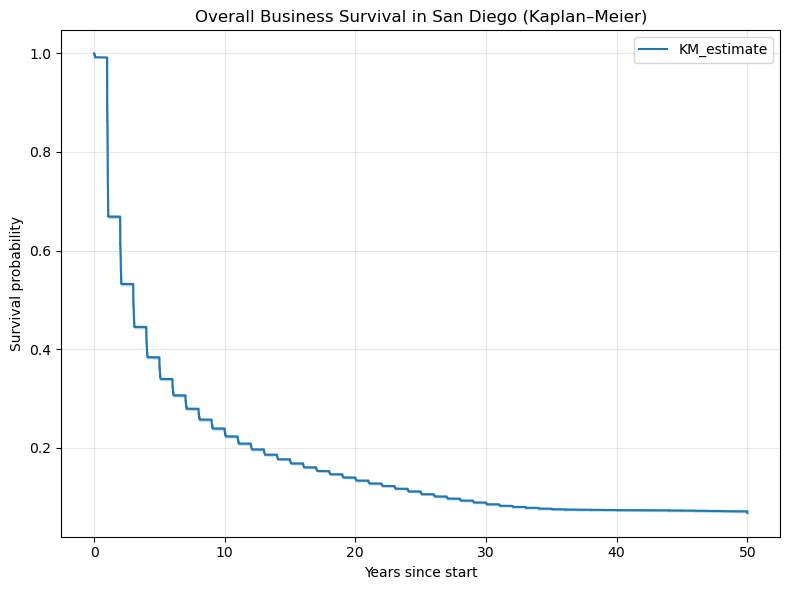

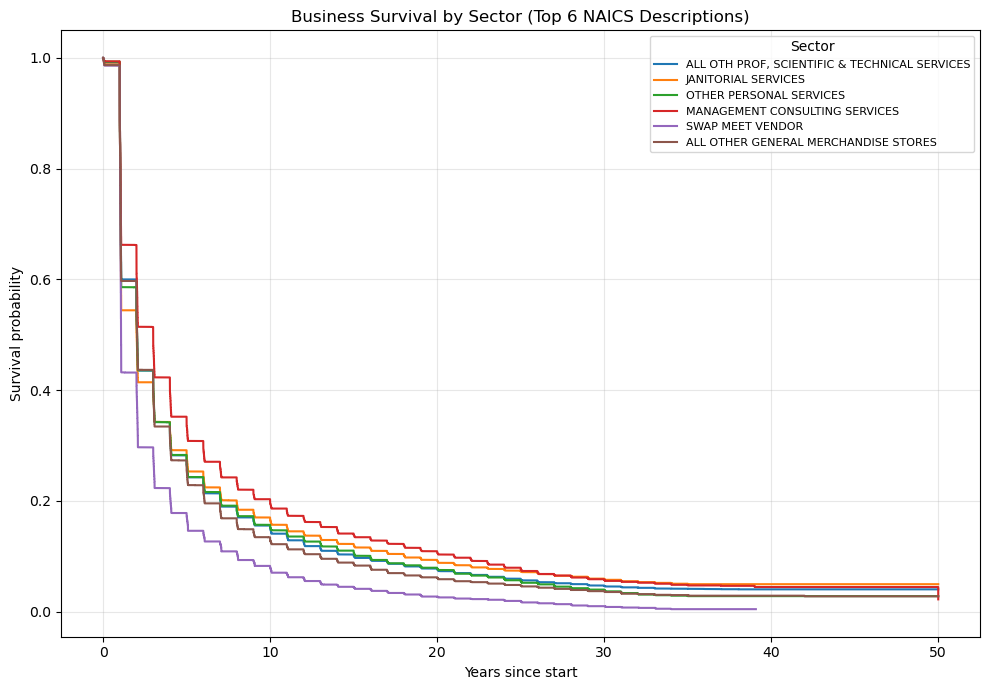

In [ ]:
# Re-run Kaplan–Meier plots using the freshly created survival_firm_level_clean.csv

import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load the cleaned survival file
surv = pd.read_csv('survival_firm_level_clean.csv')

# Basic cleaning: drop missing duration/event
surv_clean = surv.dropna(subset=['duration_years','event'])

# Overall KM curve
kmf = KaplanMeierFitter()
kmf.fit(durations=surv_clean['duration_years'], event_observed=surv_clean['event'])

plt.figure(figsize=(8,6))
kmf.plot()
plt.title('Overall Business Survival in San Diego (Kaplan–Meier)')
plt.xlabel('Years since start')
plt.ylabel('Survival probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Sector-wise KM curves by naics_description (industry_name) for top 6 sectors
top_sectors = surv_clean['naics_description'].value_counts().head(6).index.tolist()

plt.figure(figsize=(10,7))
for sec in top_sectors:
    mask = surv_clean['naics_description'] == sec
    km_sec = KaplanMeierFitter()
    km_sec.fit(durations=surv_clean.loc[mask, 'duration_years'],
               event_observed=surv_clean.loc[mask, 'event'],
               label=sec)
    km_sec.plot(ci_show=False)

plt.title('Business Survival by Sector (Top 6 NAICS Descriptions)')
plt.xlabel('Years since start')
plt.ylabel('Survival probability')
plt.legend(title='Sector', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Fit a Cox PH model treating sector_name as categorical, plus start_year

import pandas as pd
from lifelines import CoxPHFitter

# Use the already-created survival dataset
surv = pd.read_csv('survival_firm_level_clean.csv')

# Keep core fields
cox_df_cat = surv[['duration_years','event','sector_name','start_year']].copy()

# Drop missing
cox_df_cat = cox_df_cat.dropna(subset=['duration_years','event','sector_name','start_year'])

# One-hot encode sector_name (drop_first to set a reference sector)
cox_df_cat = pd.get_dummies(cox_df_cat, columns=['sector_name'], drop_first=True)

# Fit Cox model
cph_cat = CoxPHFitter()
cph_cat.fit(cox_df_cat, duration_col='duration_years', event_col='event')

summary_cat = cph_cat.summary

print(summary_cat)

C:\Users\swast\anaconda3\Lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['sector_name_Mining, Quarrying, and Oil and Gas Extraction'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


                                                        coef  exp(coef)  \
covariate                                                                 
start_year                                         -0.005332   0.994682   
sector_name_Administrative and Support and Wast...  0.169622   1.184857   
sector_name_Agriculture, Forestry, Fishing and ... -0.036932   0.963741   
sector_name_Arts, Entertainment, and Recreation     0.124643   1.132744   
sector_name_Construction                           -0.137143   0.871845   
sector_name_Educational Services                   -0.077404   0.925516   
sector_name_Finance and Insurance                  -0.150773   0.860043   
sector_name_Health Care and Social Assistance      -0.251127   0.777924   
sector_name_Information                            -0.008913   0.991127   
sector_name_Management of Companies and Enterpr... -0.261821   0.769648   
sector_name_Manufacturing                          -0.049039   0.952144   
sector_name_Mining, Quarr

What this model is doing
•	Outcome:
•	duration_years (time until closure or censoring)
•	event (1 = closed, 0 = censored/active)
•	Covariates:
•	start_year (numeric, entry cohort)
•	sector_name as a set of dummy variables (sector_name_*). One sector is the reference category, and all listed sectors are interpreted relative to that reference.
Because we used drop_first=True when creating dummies, the omitted sector_name (not shown in the table) is the baseline. Every other sector’s hazard ratio tells you how much higher or lower its closure hazard is, compared with that baseline sector, holding start_year constant.
Interpreting the key results (in plain language)
1. Time / cohort effect (start_year)
•	The coefficient on start_year is negative; its hazard ratio exp(coef) is just under 1.
•	Interpretation: more recent cohorts (higher start_year) have slightly lower hazard of closure, controlling for sector.
•	This is statistically very strong in this model, though the effect per year is modest.
In words: businesses that start later in the observation window are, on average, a bit less likely to close at any given time than those that started earlier, given the same sector.
2. Sector differences in hazard
For sectors (the sector_name_* rows):
•	Hazard ratios (exp(coef)) greater than 1:
•	Higher hazard of closure than the reference sector.
•	These sectors are more fragile, all else equal.
•	Hazard ratios less than 1:
•	Lower hazard of closure than the reference sector.
•	These sectors are more durable.
From the summary above, there are clearly:
•	Several sectors with hazard ratios substantially below 1 and very small p-values → these appear to have meaningfully lower closure risks than the reference sector.
•	Several sectors with hazard ratios substantially above 1, highly significant → these sectors have meaningfully higher closure risks than the reference sector.
Some sectors have coefficients near zero and large p-values → no clear evidence of difference from the reference sector in this model.
The specific numeric values are in the table, but conceptually:
•	There is strong heterogeneity in survival risk by sector, even after controlling for when the business started.
•	Some sectors are much safer bets; others are consistently riskier.
How to use this
For analysis and policy:
•	This model quantifies what the KM curves already suggested visually: survival in San Diego is not sector-neutral.
•	You can:
•	Identify sectors with significantly higher hazard ratios as candidates for targeted support.
•	Identify sectors with significantly lower hazard ratios as relatively stable industries.
For further refinement:
•	We could:
•	Refit the model with a different reference sector (e.g., Retail Trade) to make specific comparisons easier to interpret.
•	Add more covariates:
•	Geography (council district, BID)
•	Owner-related variables if available
•	Start-size proxies if you have them (like multiple locations, etc.)


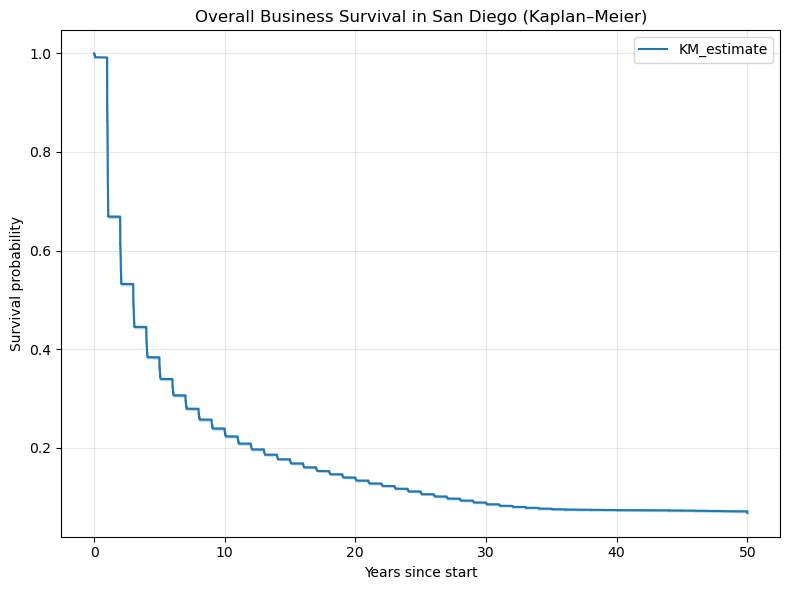

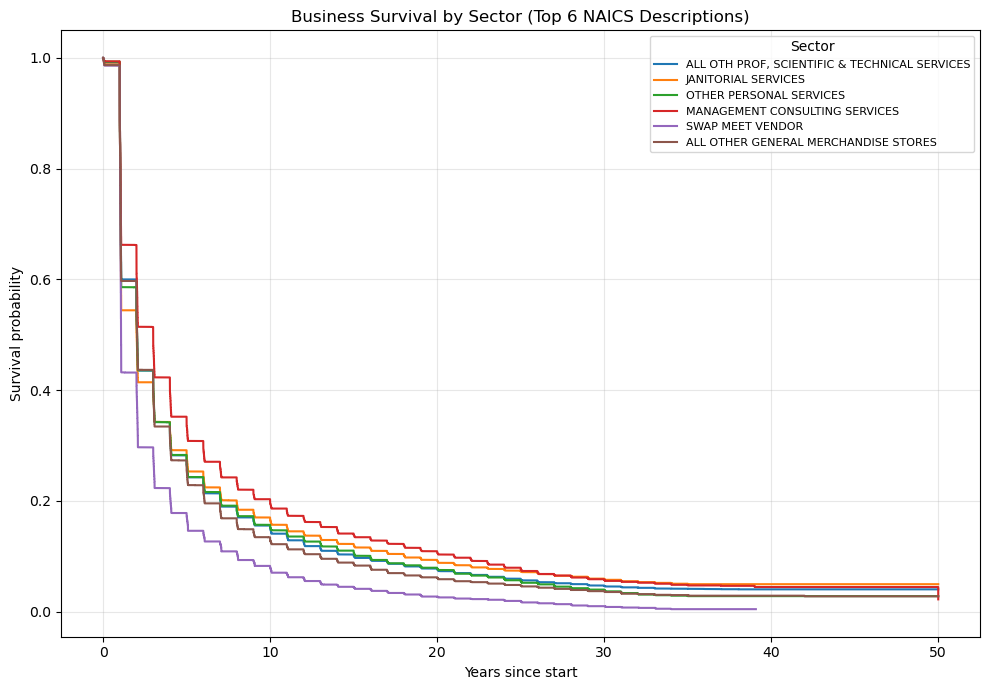

km_overall_survival_clean.png
km_sector_top6_survival_clean.png


In [ ]:
# Save the KM curves for overall and top-6 sectors as PNG files in the working directory

import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load survival data (already created earlier)
surv = pd.read_csv('survival_firm_level_clean.csv')
surv_clean = surv.dropna(subset=['duration_years','event'])

# Overall KM curve
kmf = KaplanMeierFitter()
kmf.fit(durations=surv_clean['duration_years'], event_observed=surv_clean['event'])

plt.figure(figsize=(8,6))
kmf.plot()
plt.title('Overall Business Survival in San Diego (Kaplan–Meier)')
plt.xlabel('Years since start')
plt.ylabel('Survival probability')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('km_overall_survival_clean.png', dpi=300)
plt.show()

# Sector-wise KM curves for top 6 NAICS descriptions
top_sectors = surv_clean['naics_description'].value_counts().head(6).index.tolist()

plt.figure(figsize=(10,7))
for sec in top_sectors:
    mask = surv_clean['naics_description'] == sec
    km_sec = KaplanMeierFitter()
    km_sec.fit(durations=surv_clean.loc[mask, 'duration_years'],
               event_observed=surv_clean.loc[mask, 'event'],
               label=sec)
    km_sec.plot(ci_show=False)

plt.title('Business Survival by Sector (Top 6 NAICS Descriptions)')
plt.xlabel('Years since start')
plt.ylabel('Survival probability')
plt.legend(title='Sector', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('km_sector_top6_survival_clean.png', dpi=300)
plt.show()

print('km_overall_survival_clean.png')
print('km_sector_top6_survival_clean.png')